In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(img, title=None, cmap='gray'):
    plt.figure(figsize=(10, 6))
    if title:
        plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.show()

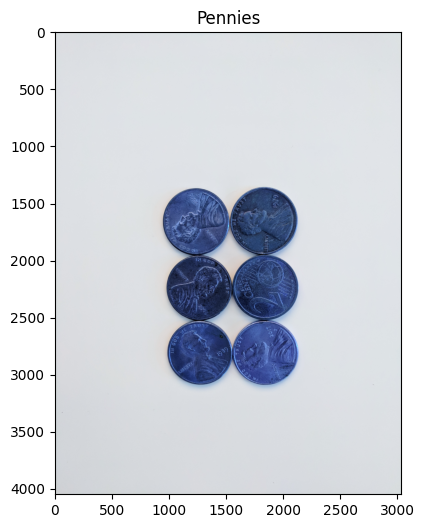

In [2]:
sep_coin = cv2.imread("../../resources/DATA/pennies.jpg")
display(sep_coin, "Pennies")

In [3]:
# previous algorithms
# median blur, grayscale, binary threshold, find contours

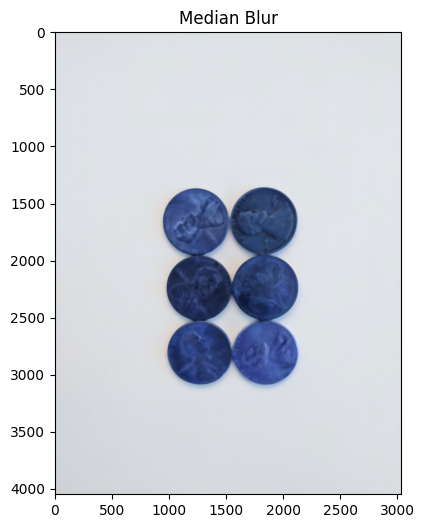

In [4]:
sep_blur = cv2.medianBlur(sep_coin, 25)
display(sep_blur, "Median Blur")

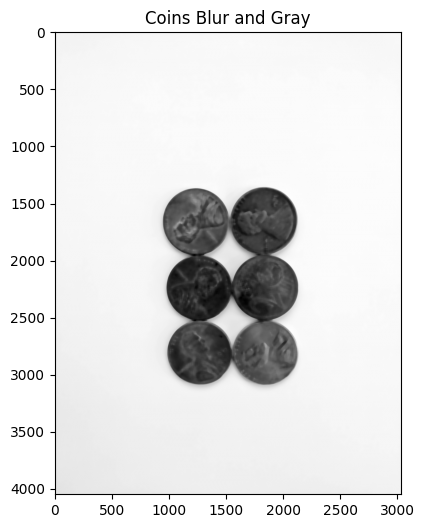

In [5]:
sep_gray = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)
display(sep_gray, "Coins Blur and Gray")

In [6]:
ret, sep_thresh = cv2.threshold(sep_gray, 160, 256, cv2.THRESH_BINARY_INV)
ret

160.0

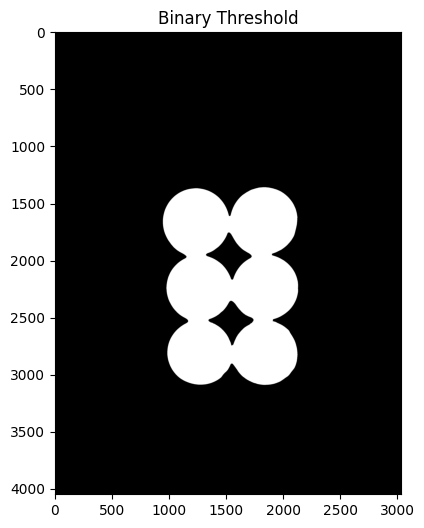

In [7]:
display(sep_thresh, "Binary Threshold")

In [8]:
contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
np.unique_counts(hierarchy[..., 3])

UniqueCountsResult(values=array([-1,  0], dtype=int32), counts=array([1, 2]))

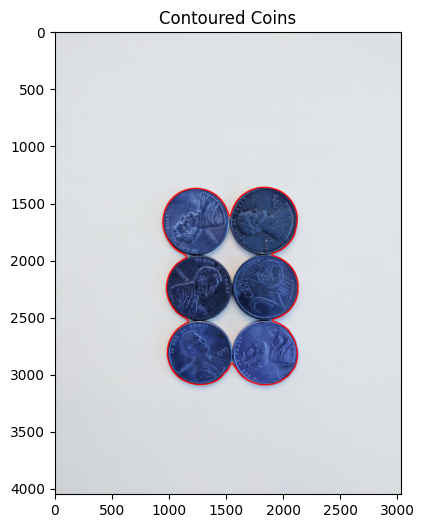

In [9]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: # external
        cv2.drawContours(sep_coin, contours, i, (255, 0, 0), 10)

display(sep_coin, "Contoured Coins")

In [10]:
# now comes watershed

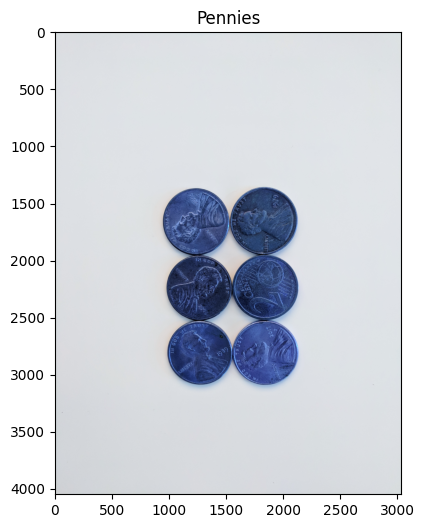

In [11]:
sep_coin = cv2.imread("../../resources/DATA/pennies.jpg")
display(sep_coin, "Pennies")

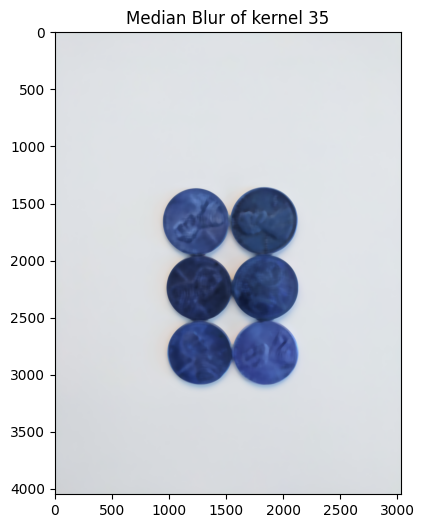

In [12]:
sep_coin = cv2.medianBlur(sep_coin, 35)
display(sep_coin, "Median Blur of kernel 35")

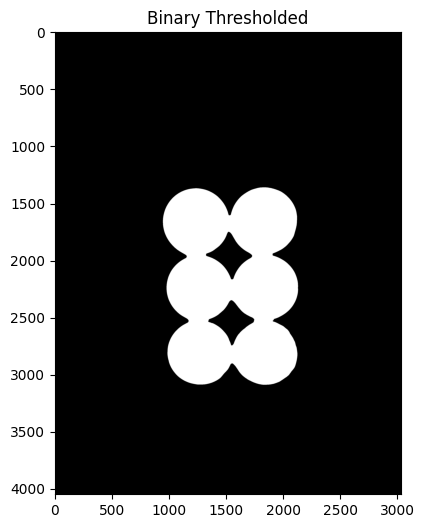

In [13]:
gray = cv2.cvtColor(sep_coin, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display(thresh1, "Binary Thresholded")

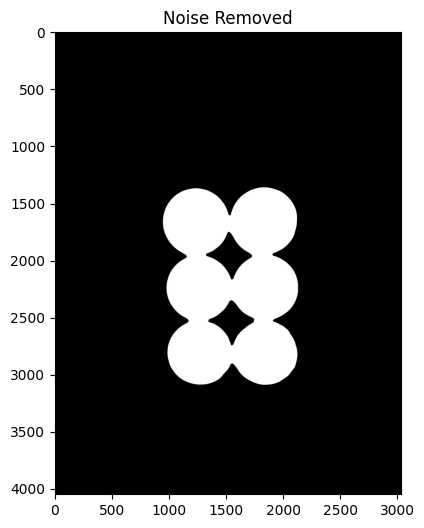

In [14]:
# Noise Removal
kernel = np.ones((3, 3), dtype=np.uint8)
opening = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening, "Noise Removed")

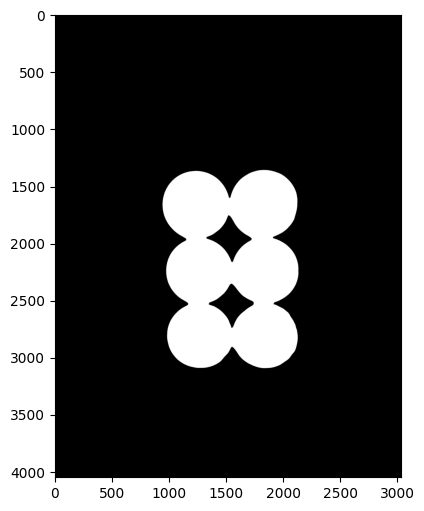

In [15]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

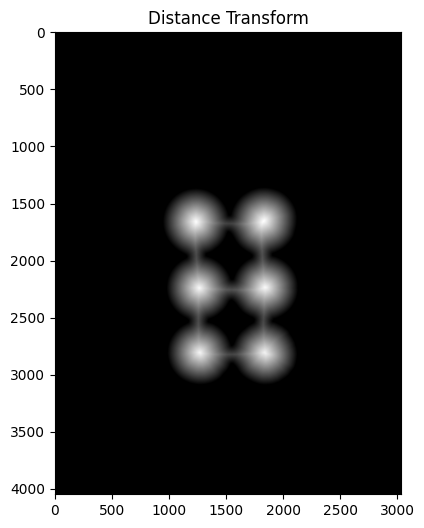

In [16]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform, 'Distance Transform')

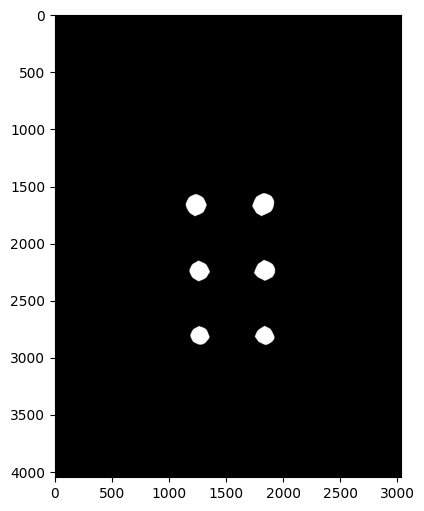

In [17]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
display(sure_fg)

In [18]:
sure_fg = sure_fg.astype(np.uint8)
unknown = cv2.subtract(sure_bg, sure_fg)

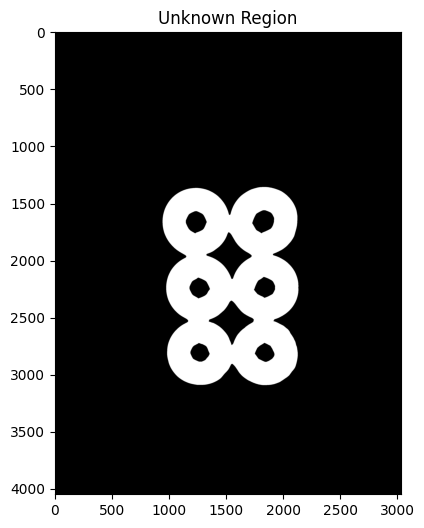

In [19]:
display(unknown, "Unknown Region")

In [20]:
ret, markers = cv2.connectedComponents(sure_fg)

In [21]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4048, 3036), dtype=int32)

In [22]:
markers += 1

In [23]:
markers[unknown==255] = 0

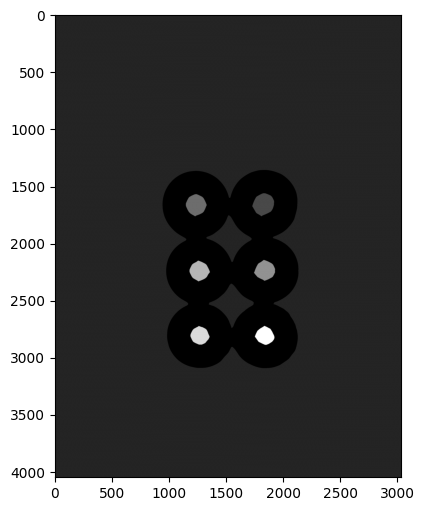

In [24]:
display(markers)

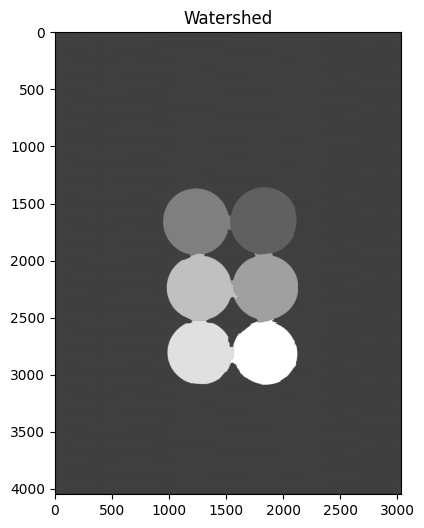

In [25]:
markers = cv2.watershed(sep_coin, markers)
display(markers, "Watershed")

In [26]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
np.unique_counts(hierarchy[..., 3])

UniqueCountsResult(values=array([-1], dtype=int32), counts=array([10]))

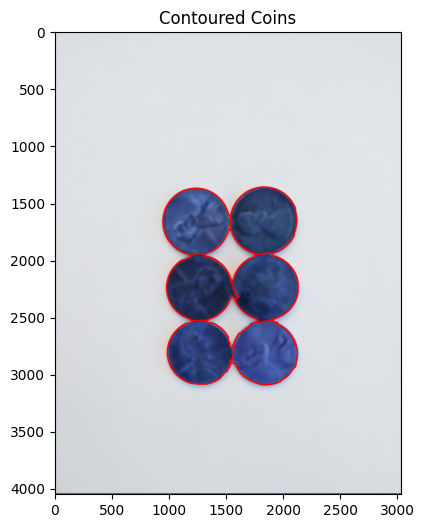

In [27]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: # external
        cv2.drawContours(sep_coin, contours, i, (255, 0, 0), 10)

display(sep_coin, "Contoured Coins")